# Linear Regression

-------------  

_Author: Carleton Smith_

<a id = "top"></a>
## Questions
- [Question 1](#q1)
- [Question 2](#q2)
- [Question 3](#q3)
- [Question 4](#q4)
- [Question 5](#q5)
- [Question 6](#q6)
- [Question 7](#q7)
- [Question 8](#q8)
- [Question 9](#q9)
- [Question 10](#q10)
- [Question 11](#q11)
- [Question 12](#q12)
- [Question 13](#q13)

<a id = "overview"></a>
## Assignment Overview

Linear regression is one of the most ubiquitous models used in practice due to its simplicity (in both ease of deployment &  interpretation). The goal of this assignment is to reinforce your understanding of the mechanics of linear regression, to set up a regression analysis, and to interpret the results. You'll achieve these goals by going through and most of a end-to-end data science project using regression.

This assignment will test your ability to:

1. Explore and prepare a dataset for Linear Regression
2. Create a linear regression model using `scikit-learn` and `statsmodels` packages
3. Correctly interpret the results from a linear regression analysis
4. Diagnose model shortcomings and address them
5. Perform feature selection to reach a parsimonious and generalized model

Let's get started.

#### EXPECTED TIME 1.5 HRS

## Assignment Contents

- [Assignment Overview](#overview)
- [Introduction](#intro)
- [Define the Problem](#define)
- [Acquire Data](#acquire)
- [Preprocess Data](#preprocess)
- [Data Exploration](#exploration)
- [Modeling & Feature Selection](#modeling)
  - [Predictions with Test Data](#m1_test_pred)
  - [Calculating Error](#error)
  - [Dummy Variables](#dummy-variables)
  - [A Second Model using More Features](#model-2)
  - [Remediate Model Shortcomings](#remediate)
  - [The `scikit-learn` Implementation](#scikit-learn)
- [Communicate Results](#communicate)
- [Deploy](#deploy)

[Back to top](#top)
<a id = "intro"></a>

## Introduction

The job of a Data Scientist is to solve problems. While Data Scientists work in many application domains (finance, health care, etc.), the problems solved by Data Scientists typically involve making predictions for data that are too expensive, too time consuming, or even impossible to measure directly. For example, I wish that I could measure tomorrow's stock price of Apple, Inc. For obvious reasons, this is not possible. So, as a Data Scientist, I may collect _features_ of Apple's company, the economy, and other market factors to use in a predictive model. I would then use this model to make investment decisions.

Regardless of the domain, Data Scientists tend to apply the same general framework for approaching a problem:

  1. [Define the problem and hypothesis](#define)
  2. [Acquire data](#acquire)
  3. [Preprocess data](#preprocess)
  4. [Explore data](#explore)
  5. [Feature Engineering/Modeling](#modeling)
  6. [Communicate Results](#communicate)
  7. [Deploy](#deploy)
    
An important note is that this process is not a linear work-flow in practice. Quite often, you will need to jump back and forth between steps as the project advances. You will focus mostly be on steps 3-5 through this assignment.

You will first prepare the data set to be explored and consumed by a linear regression model in the preprocessing step, then visualize correlations and distributions in the exploration step, build and interpret a model in step 5, and finally conclude with addressing shortcomings.

[Back to top](#top)
<a id = "define"></a>

## Define the Problem

**Problem**: Using housing data, you will attempt to predict housing prices using a regression model.

There are many potential use cases for forecasting housing prices. A real-estate professional may be interested in forecasting revenue. A homeowner may be interested in identifying important features that affect sales price so that they can make appropriate renovation decisions before selling. In any case, your hypothesis is that the specific housing features you collect, such as square footage, bedrooms, etc, are predictive of future housing prices.

[Back to top](#top)
<a id = "acquire"></a>

## Acquire Data

**Data**: The data for this assignment comes from [Kaggle's House Prices Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). The data set consists of 1460 rows and 81 columns. Each row contains features, both qualitative and quantitative, that characterize a housing property. The `SalePrice` column is the target variable.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore") # to suppress warnings; remove if errors persist!

In [2]:
pd.set_option("display.max_columns", 81)

In [3]:
FILEPATH = '../resource/asnlib/publicdata/train.csv'
houses = pd.read_csv(FILEPATH)

In [4]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


[Back to top](#top)
<a id = "preprocess"></a>

## Preprocess Data

Preprocessing and exploring data is time consuming. In the interest of brevity, you'll focus on a subset of features. After extracting the desired features, you will partition the data into *training* and *testing* sets. This is a standard practice for any data science project.

In [5]:
# list of columns to keep
COLS_TO_KEEP = [
    'SalePrice',
    'LotArea',
    'LotShape',
    'Neighborhood',
    'HouseStyle',
    'HeatingQC',
    'KitchenQual',
    'GarageFinish',
    'YearBuilt',
    'TotRmsAbvGrd',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'GarageArea',
    '1stFlrSF',
]

In [6]:
# grab the columns you want and print number of rows and columns
houses = houses[COLS_TO_KEEP].copy()
print('Number of Rows:', houses.shape[0])
print('Number of Columns:', houses.shape[1])

Number of Rows: 1460
Number of Columns: 16


The following cell partitions the available data into a *training* and a *testing* set. To do this, 75% of the rows are chosen at random for the training dataset; the remaining 25% of the rows constitute the testing dataset.

In [7]:
TRAIN_SIZE = 0.75

# randomly assign row labels (indices) for training set
np.random.seed(24)
training_idx = np.random.choice(
    houses.index,
    size=int(np.round(houses.shape[0]*TRAIN_SIZE)),
    replace=False
)

# grab the index numbers that are not in training
testing_idx = list(set(training_idx) ^ set(houses.index))

# create two DataFrames
house_train = houses.loc[training_idx, :]
house_test = houses.loc[testing_idx, :]

# print out the shape of each DataFrame
print('Size of Training Set:', house_train.shape)
print('Size of Testing Set: ', house_test.shape)

Size of Training Set: (1095, 16)
Size of Testing Set:  (365, 16)


In [8]:
house_train.head()

,SalePrice,LotArea,LotShape,Neighborhood,HouseStyle,HeatingQC,KitchenQual,GarageFinish,YearBuilt,TotRmsAbvGrd,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,1stFlrSF
1000,82000,10206,Reg,Edwards,1Story,Fa,Fa,Unf,1952,4,1,0,2,1,528,944
314,178000,9600,Reg,OldTown,2Story,Ex,Ex,Unf,1925,6,1,1,3,1,546,832
518,211000,9531,IR1,CollgCr,2Story,Ex,TA,RFn,1998,7,2,1,3,1,546,882
1363,156932,8499,IR1,Gilbert,2Story,Ex,Gd,Fin,2006,6,2,1,3,1,432,616
537,111250,12735,IR1,NAmes,1Story,TA,TA,Unf,1972,5,1,0,3,1,576,864


You will continue to preprocess this dataset as you progress through the assignment, but for now, you will move on to the exploration step.

[Back to top](#top)
<a id = "exploration"></a>

## Data Exploration

You can spend an endless amount of time exploring data unless you specify your intentions first. In this step, it's important:

- to uncover the format of your dataset;
- to identify any data integrity concerns;
- to comprehend important properties of the features (e.g., distributions, units, scale, etc.); and
- to identify which specific features will be most useful in building a model (i.e., which features appear to have meaningful relationships with the target variable).

The last bullet is particularly important for regression modeling, as feature selection can be a manual and time-consuming process. As noted in Lecture 15-2, if features are not related to the target variable (`SalePrice`), you cannot expect those features to produce a good model.

Let's begin by investigating the type of data you have.

In [9]:
print('Data Types of each Variable:')
display(house_train.dtypes)

Data Types of each Variable:


SalePrice        int64
LotArea          int64
LotShape        object
Neighborhood    object
HouseStyle      object
HeatingQC       object
KitchenQual     object
GarageFinish    object
YearBuilt        int64
TotRmsAbvGrd     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
GarageArea       int64
1stFlrSF         int64
dtype: object

You have a mix of numeric and categorical data. The features listed as `object` data type are categorical variables. The features listed as `int64` are integers. These data type encodings make sense for the type of data, so you do not need to make any conversions.

You can now investigate the relationships between the numeric data and target variable.

**Numeric Exploratory Data Analysis**

To explore the data, you can extract the columns with numerical features with the Pandas DataFrame `select_dtypes` method. With the keyword argument `exclude='object'`, you obtain a sub-DataFrame with only numerical columns.

In [10]:
# grab numeric columns
num_house = house_train.select_dtypes(exclude='object')
num_house.head()

,SalePrice,LotArea,YearBuilt,TotRmsAbvGrd,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,1stFlrSF
1000,82000,10206,1952,4,1,0,2,1,528,944
314,178000,9600,1925,6,1,1,3,1,546,832
518,211000,9531,1998,7,2,1,3,1,546,882
1363,156932,8499,2006,6,2,1,3,1,432,616
537,111250,12735,1972,5,1,0,3,1,576,864


The Pandas DataFrame `hist` method can then be used to display distributions of numerical features:

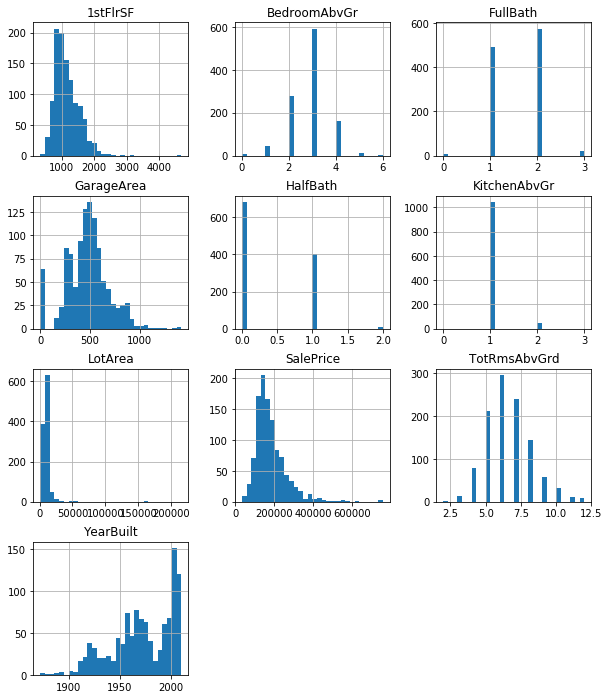

In [11]:
num_house.hist(figsize=(10,12), bins=30);

Moreover, the DataFrame also has a method `corr` that computes a [correlation matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence#Correlation_matrices). As expected, the table produced (as a Pandas DataFrame) is symmetric with ones on the diagonal and displays scores between -1 and +1.

In [12]:
display(num_house.corr())

,SalePrice,LotArea,YearBuilt,TotRmsAbvGrd,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,1stFlrSF
SalePrice,1.000000,0.267140,0.532731,0.542408,0.560259,0.288761,0.177172,-0.138624,0.608937,0.600286
LotArea,0.267140,1.000000,0.018054,0.176752,0.126289,0.002807,0.104854,-0.018507,0.166025,0.292932
YearBuilt,0.532731,0.018054,1.000000,0.133471,0.483148,0.253796,-0.040887,-0.166671,0.490055,0.295545
TotRmsAbvGrd,0.542408,0.176752,0.133471,1.000000,0.558603,0.341215,0.667204,0.227480,0.339285,0.406787
FullBath,0.560259,0.126289,0.483148,0.558603,1.000000,0.135435,0.384722,0.122859,0.389756,0.369440
HalfBath,0.288761,0.002807,0.253796,0.341215,0.135435,1.000000,0.225330,-0.085398,0.160923,-0.133728
BedroomAbvGr,0.177172,0.104854,-0.040887,0.667204,0.384722,0.225330,1.000000,0.167311,0.067647,0.105683
KitchenAbvGr,-0.138624,-0.018507,-0.166671,0.227480,0.122859,-0.085398,0.167311,1.000000,-0.068284,0.074834
GarageArea,0.608937,0.166025,0.490055,0.339285,0.389756,0.160923,0.067647,-0.068284,1.000000,0.476866
1stFlrSF,0.600286,0.292932,0.295545,0.406787,0.369440,-0.133728,0.105683,0.074834,0.476866,1.000000


With a large number of features, the preceding table can be difficult to parse. It's sometimes helpful to visualize the correlation matrix with a heatmap. The function `heatmap` from the Python package [Seaborn](https://seaborn.pydata.org/index.html) (aliased as `sns` here) can produce a more convenient way to perceive strong & weak correlations.

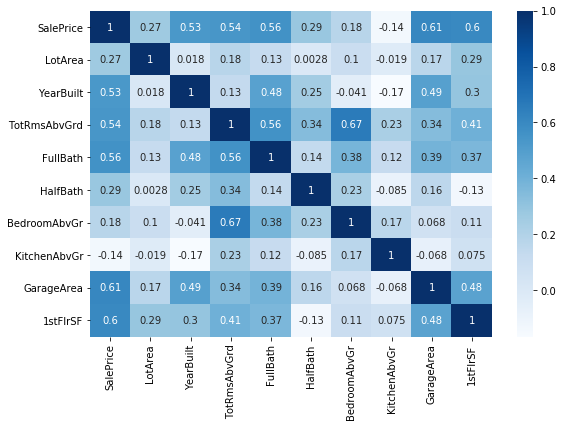

In [13]:
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(num_house.corr(), cmap='Blues', annot=True, ax=ax);

<a id = "q1"></a>
[Back to top](#top)

#### Question 1

**True** or **False**: Consider the correlation matrix above. Holding all other variables constant, 
a 1-unit increase in the `FullBath` feature correlates to a 0.56 unit decrease
in the `SalePrice`.

In [14]:
### GRADED
### True or False:
### 
### Assign `ans1` as a Python boolean literal (i.e., True or False)
import statsmodels.api as sm
ans1 = False
### For verifying answer:
print(ans1)
print('(Make sure you provide your answer as a boolean (True/False).)')
print('Your response dtype:',type(ans1))

False
(Make sure you provide your answer as a boolean (True/False).)
Your response dtype: <class 'bool'>


In [15]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#top)
<a id = "modeling"></a>

## Modeling & Feature Selection

Now that you have preprocessed and explored your data, you can now build a model.

## import statsmodels.api as sm

In [16]:
# assign target to new variable
price_train = house_train['SalePrice'].values

# use year built to predict price: add constant for intercept
year_built = sm.add_constant(house_train['YearBuilt'], prepend=False)

# instantiate model
slr_mod = sm.OLS(price_train, year_built)

# fit the beta coefs
model_1 = slr_mod.fit()

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     433.1
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           2.69e-81
Time:                        00:42:34   Log-Likelihood:                -13726.
No. Observations:                1095   AIC:                         2.746e+04
Df Residuals:                    1093   BIC:                         2.747e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
YearBuilt   1429.1280     68.670     20.811      0.0

The following questions reference the preceding output.

[Back to top](#top)
<a id = "q2"></a>

#### Question 2

##### Model 1 Output

<img src="./resource/asnlib/publicdata/lin-reg-m1.png">

The $\beta$ coefficient for `YearBuilt` is significant according to 
the t-stat and p-value. Thus, you can reject the null hypothesis and accept the alternative hypothesis.

According to the null hypothesis rejected, what is the predicted numerical value
for the beta coefficient population parameter of the `YearBuilt` feature?

In [17]:
### GRADED
###
### According to the null hypothesis rejected, what is the predicted value
### for the beta coefficient population parameter of the "YearBuilt" feature?
###
### Assign your answer as an integer to the variable `ans2`.
ans2 = int(0)
### For verifying answer:
print("Null Hypothesis: 'YearBuilt_beta' = {}".format(ans2))

Null Hypothesis: 'YearBuilt_beta' = 0


In [18]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#top)
<a id = "q3"></a>

#### Question 3

##### Model 1 Output

<img src="./resource/asnlib/publicdata/lin-reg-m1.png">

The preceding model has a single exogenous variable, namely `YearBuilt`, to predict `SalePrice`. What is the predicted difference in sales price for two (otherwise identical) houses built 7.5 years apart?

+ Use the fact that $\beta$ coefficient for `YearBuilt` is $1429.1280$.
+ Save your answer as `ans3`.
+ Round to a single decimal place. 

In [19]:
### GRADED
### 
### The model above uses one variable, 'YearBuilt' to predict 'SalePrice'. Knowing that  
### the beta coefficient for 'YearBuilt' is 1429.1280, what is the difference in 
### predicted sales price for two houses that are built 7.5 years apart?
### 
### Assign your answer as float to the variable `ans3`. 
### Round your answer to one decimal place.
ans3 = round(1429.1280*7.5, 1)
ans31 = round(model_1.params['YearBuilt'] * 7.5, 1)
print(ans31)
### For verifying answer:
print("Difference in 'SalePrice': ${}".format(ans3))
print('Data type of answer (should be float): {}'.format(type(ans3)))

10718.5
Difference in 'SalePrice': $10718.5
Data type of answer (should be float): <class 'float'>


In [20]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#top)
<a id = "q4"></a>

#### Question 4

##### Model 1 Output

<img src="./resource/asnlib/publicdata/lin-reg-m1.png">

With the preceding model, what is the ratio of explained variance to total variance of `SalePrice`?

+ Save your answer as a floating-point value to the variable `ans4`. 
+ Round your response to four decimal places.

In [21]:
### GRADED
### 
### What is the ratio of the explained variance 
### to the total variance of 'SalePrice'?
### 
### Assign your answer as float to the variable 'ans4'. 
### Round your answer to four decimal places.
ans4 = round(0.284,4)

print(ans4)

0.284


In [22]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#top)
<a id = "m1_test_pred"></a>

### Predictions with Test Data

Let's now look at how this model performs on *testing* data.

In [23]:
# grab the target variable
price_test = house_test['SalePrice'].values

# prepare the testing set for prediction by adding column of ones for constant
year_built_test = sm.add_constant(house_test['YearBuilt'], prepend=False)

# make test predictions
y_hat_test = model_1.predict(year_built_test)
print('First 5 test predictions:')
display(y_hat_test.head())

First 5 test predictions:


1     186901.659476
2     222629.859861
4     221200.731845
12    166893.867261
13    229775.499938
dtype: float64

[Back to top](#top)
<a id = "error"></a>

### Calculating Error

You will use these predictions to calculate the explained error (SSR) and unexplained error (SSE). Recall from lecture 15-4 that SST = SSE + SSR

Additionally, you can calculate the following with these types of error:


$$
\begin{array}{|c|c|}
\hline
\text{R-squared} & \displaystyle{\frac{\text{SSR}}{\text{SST}}} \\ \hline
\text{MSR} & \displaystyle{\frac{\text{SSR}}{\text{Regression Degrees of Freedom}}} \\ \hline
\text{MSE} & \displaystyle{\frac{\text{SSE}}{\text{Regression Degrees of Freedom}}} \\ \hline
\text{F-measure} & \displaystyle{\frac{\text{MSR}}{\text{MSE}}} \\
\hline
\end{array}
$$

You will now see how your model performs on your testing set. This will give you an idea of how the model generalizes, i.e., how it would perform if making predictions on new data after being deployment. The next few questions require calculations of error and goodness of fit computed using the testing data.

[Back to top](#top)

<a id = "q5"></a>
#### Question 5

Use the *testing* data `house_test` to calculate the *Total Sum of Squared Error (SST)* of the target variable `SalePrice`.

+ The formula is explained in lecture 15-4.
+ The mean of SalePrice is calculated for you below as `price_test_mean`.
+ Use a floating-point value to represent the SST.
+ Assign the calculated value for the SST to the variable `ans5`.

In [40]:
### GRADED
### 
### Using the TESTING data - `house_test` - calculate 
### the Total Sum of Squared Error (SST) of the target variable, `SalePrice`.
### Assign the value for the SST as a float to the variable ans5 below.
###
# Mean of target variable (provided)
price_test_mean = house_test['SalePrice'].mean()
#print(house_test.head())
#print(range(len(house_test)))
#Your answer here
sum_var = 0
for i in range(len(house_test)):
    #print(i, ' - ', house_train.iloc[i]['SalePrice'])
    sum_var = sum_var + (house_test.iloc[i]['SalePrice']-price_test_mean)**2

ans5 = sum_var
#print(ans5)
### For verifying answer:
print("Total Sum of Square Error (should be a number):", ans5)

Total Sum of Square Error (should be a number): 2293612720967.7393


In [25]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#top)

<a id = "q6"></a>
#### Question 6

Use the *testing* data `house_test` to calculate the *Regression Sum of Squared Error (SSR)* of the target variable `SalePrice` (also called the *explained variance*).

+ The formula is explained in lecture 15-4.
+ The mean of SalePrice, the target labels, and the mean of the target values are calculated for you below as `price_test_mean`, `price_test` and `y_hat_test` respectively.
+ Use a floating-point value to represent the SSR.
+ Assign the calculated value for the SSR to the variable `ans6`.

In [39]:
### GRADED
### 
### Using the TESTING data - `house_test` - calculate 
### the Residual Sum of Squares (SSR) of the target variable, `SalePrice`.
### Assign the value for the SSR as a float to the variable ans6 below.
###
# Mean of target variable (provided)
price_test_mean = house_test['SalePrice'].mean()
# target labels - testing (provided)
price_test = house_test['SalePrice'].values
# testing predictions (provided)
y_hat_test = model_1.predict(year_built_test)

# Your answer here
sum_var = 0
for i in range(len(y_hat_test)):
    #print(i, ' - ', y_hat_test.iloc[i])
    sum_var = sum_var + (y_hat_test.iloc[i]-price_test_mean)**2
    #print()

ans6 = sum_var
### For verifying answer:
print("Regression Sum of Square (should be a number): {}".format(ans6))

Regression Sum of Square (should be a number): 757059077258.1818


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#top)

<a id = "q7"></a>
#### Question 7

With the two calculations above, you can calculate the testing R-squared value (i.e., the fraction of variability explained by the model). Use the testing data to calculate the R-squared value.

+ HINT: This is covered in lecture 15-4.
+ Assign your answer to the variable `ans7`.
+ Round your result to four decimal places. 

In [41]:
### GRADED
### 
### Calculate the R-squared value on the testing data. Assign your 
### answer to the variable `ans7` rounded to 4 decimal places. 
### 
# Testing labels (provided)
price_test = house_test['SalePrice'].values
# Testing features (provided)
year_built_test = sm.add_constant(house_test['YearBuilt'], prepend=False)
# Testing predictions (provided)
y_hat_test = model_1.predict(year_built_test).values
# Mean of testing labels (provided)
price_test_mean = house_test['SalePrice'].mean()
# Your answer here
ans7 = ans6/ans5
print(ans7)

0.330072758289707


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#top)
<a id = "dummy-variables"></a>

### Dummy Variables

You can now increase the model complexity by introducing a categorical variable: `GarageFinish`. To use a categorical variable in a linear regression model, it needs to be encoded numerically. One strategy is to create *dummy variables* for each category. Introducing dummy variables requires an additional binary feature (i.e., with values 0 or 1) corresponding to each category of the original categorical feature.

In this case, the dummy variables corresponding to the `GarageFinish` categories are `NoGarage`, `Unf`, `RFn`, & `Fin`:

- `NoGarage`: Property does not have a garage
- `Unf`: Unfinished garage interior
- `RFn`: Rough finish
- `Fin`: Completely finished interior

Below are the row counts and definition of each category of the `GarageFinish` feature.

In [42]:
print('Number of training observations:')
display(house_train['GarageFinish'].value_counts())

Number of training observations:


Unf         445
RFn         329
Fin         257
NoGarage     64
Name: GarageFinish, dtype: int64

To create dummy variables for the `GarageFinish` variable, you will use the `pandas` function `pd.get_dummies`.

In [43]:
print('-'*40)
print('First 5 training rows:')
display(house_train[['GarageFinish']].head())
print('-'*40)
print('First 5 dummy training rows:')
display(pd.get_dummies(house_train['GarageFinish']).head())

----------------------------------------
First 5 training rows:


,GarageFinish
1000,Unf
314,Unf
518,RFn
1363,Fin
537,Unf


----------------------------------------
First 5 dummy training rows:


,Fin,NoGarage,RFn,Unf
1000,0,0,0,1
314,0,0,0,1
518,0,0,1,0
1363,1,0,0,0
537,0,0,0,1


As expected, the dummy variables have values 0 or 1 according to which category applies for a given observation. Notice that, for each row, only one column can be nonzero (because the categories are mutually exclusive). As such, one column can be designated a *reference category* and not stored (since, if all the other columns in a given row are zero, the reference column has to contain a one).

[Back to top](#top)
<a id = "q8"></a>

#### Question 8

How many additional columns are required to represent the `KitchenQual` feature with dummy variables?

+ HINT: This is covered in Lecture 15-5.
+ Assume that no category is designated as a reference category.
+ Save your answer as a Python integer with identifier `ans8`.

In [54]:
### GRADED
### 
### How many additional dummy variables are needed to represent the 'KitchenQual'
### feature with dummy variables?
### Assign your answer as an integer to the variable `ans8`.
display(house_train['KitchenQual'].value_counts())
ans8 = 4
print(ans8)

TA    550
Gd    447
Ex     69
Fa     29
Name: KitchenQual, dtype: int64

4


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#top)
<a id = "model-2"></a>

### A Second Model using More Features

You can now create a DataFrame using different numeric & categorical features to build a new model. For this model, you'll use the following features:
- `GarageFinish`: Interior finish of the garage (categorical)
- `TotRmsAbvGrd`: Total rooms above grade - not including bathrooms (numeric)
- `BedroomAbvGr`: Number of bedrooms above grade (numeric)

In [48]:
# grab YearBuilt and GarageFinish columns
MODEL_2_COLS = ['TotRmsAbvGrd', 'BedroomAbvGr', 'GarageFinish']
rm_garage_train = house_train[MODEL_2_COLS]

# create dummy variables
rm_garage_train_dummies = pd.get_dummies(rm_garage_train, drop_first=True)

# display the first 5 training rows of feature set
print("First 5 training set:")
display(rm_garage_train_dummies.head())

First 5 training set:


,TotRmsAbvGrd,BedroomAbvGr,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
1000,4,2,0,0,1
314,6,3,0,0,1
518,7,3,0,1,0
1363,6,3,0,0,0
537,5,3,0,0,1


[Back to top](#top)
<a id = "q9"></a>

#### Question 9

Looking at the `rm_garage_train_dummies` DataFrame above, which category of the `GarageFinish` variable is the *reference category*?
 
+ Assign your answer as a string to the `ans9` variable.

In [53]:
### GRADED
### 
### According to the `rm_garage_train_dummies` DataFrame shown 
### above, which category within the 'GarageFinish' variable 
### is the "reference category"?
### 
### Assign your answer as a string to the `ans9` variable. 
display(house_train['GarageFinish'].value_counts())
ans9 = 'Fin'


Unf         445
RFn         329
Fin         257
NoGarage     64
Name: GarageFinish, dtype: int64

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


With your feature DataFrame fully prepared, you can fit a new model.

In [52]:
# grab target variable
price_train = house_train['SalePrice'].values

# add a column of ones for the intercept term
feats_train = sm.add_constant(rm_garage_train_dummies, prepend=False)

# instantiate model
lin_mod = sm.OLS(price_train, feats_train)

# fit the beta coefs
model_2 = lin_mod.fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     219.6
Date:                Wed, 07 Aug 2019   Prob (F-statistic):          4.58e-162
Time:                        07:22:30   Log-Likelihood:                -13527.
No. Observations:                1095   AIC:                         2.707e+04
Df Residuals:                    1089   BIC:                         2.710e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
TotRmsAbvGrd           2.904e+

[Back to top](#top)
<a id = "q10"></a>

#### Question 10

**True** or **False**: 

The $\beta$ coefficient for `GarageFinish_Unf` can be interpreted in the following way:
holding all else equal, a house with an unfinished garage (i.e., one with `GarageFinish==Unf`) corresponds to a decrease of roughly $\$69,290$ in `SalePrice` as opposed to a house with a finished garage (i.e., one with `GarageFinish==Fin`).

+ Assign your response as a Python boolean to the variable `ans10`.

In [56]:
### GRADED
### 
### True or False:
### 
### Assign `ans10` as a Python boolean literal (i.e., True or False)
### 
ans10 = True
### For verifying answer:
assert isinstance(ans10, bool), 'Please provide your answer as a boolean instead of a string.'

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#top)
<a id = "q11"></a>

#### Question 11

##### Model 2 Output

<img src="./resource/asnlib/publicdata/lin-reg-m2.png">


Per lecture 15-8, one sign of multicollinearity is the presence of counter-intuitive $ \beta $ coefficients. Do any of the $\beta$ coefficients shown in `model_2` output summary seem counter-intuitive? If so, list them as follows:

+ Construct a list with the name(s) of the features (as Python strings) that correspond to counter-intuitive $\beta$ coefficients.
+ Assign the list of strings to the variable `ans11`.
+ Leave the list `ans11` empty if *all* of the $\beta$-coefficients are intuitive.

In [60]:
### GRADED
### 
### Are any of the beta coefficients shown in above output summary counter-intuitive? 
### 
### Save the list of counter-intuitive column labels (strings) as `ans11`.
### 
ans11 = ['BedroomAbvGr']

### For verifying answer:
if ans11:
    assert isinstance(ans11, list), 'Please put the features names (if any) in a list.'
    ans11_low = [col.lower().strip() for col in ans11]
    all_cols = [col.lower().strip() for col in rm_garage_train_dummies.columns.tolist()]
    for feat in ans11_low:
        if feat not in all_cols:
            print("Make sure to spell the feature correctly!")

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#top)
<a id = "remediate"></a>

### Remediate Model Shortcomings

The utility of linear regression models rest on numerous assumptions. When these assumptions are violated, performance suffers. Let's now look at the process for validating the assumption of *homoscedasticity* (as discussed in lecture 15-11).

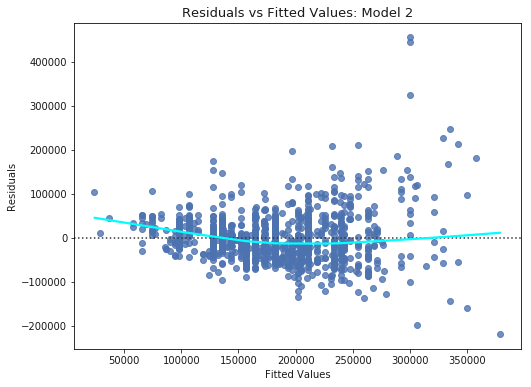

In [61]:
# Make training predictions
y_hat_train = model_2.predict(feats_train)

# Grab training labels
price_train = house_train['SalePrice'].values

# Plot the residuals of actual vs fitted values
fig, ax = plt.subplots(figsize=(8, 6))
sns.set(style="whitegrid")
sns.residplot(
    y_hat_train,
    price_train,
    lowess=True,
    color='b',
    ax=ax,
    line_kws={'color':'cyan'}
)
plt.xlabel('Fitted Values')
plt.ylabel("Residuals")
plt.title('Residuals vs Fitted Values: Model 2', fontsize=13);

Based on the the preceding residual plot, the variance appears to increase as predictions get larger. This is a clear indication of *heteroscedasticity*. The remedy for this is to choose a suitable transformation of the target (dependent) variable and refit the model using the transformed dependent variable.

[Back to top](#top)
<a id = "q12"></a>

#### Question 12

Your task here is to use the (natural) logarithm of the `SalePrice` as a transformed target variable in the training set to *refit* a linear regression model using the `statsmodels` OLS class.

+ Use the features `TotRmsAbvGrd`, `BedroomAbvGr`, and `GarageFinish` to refit the model.
+ The feature set (including dummy variables for the categorical columns) is provided for your solution in a DataFrame `rm_garage_train_dummies`.
+ Assign your instantiated and fit model to the variable `model_3`.
+ HINT: the function `numpy.log` may be helpful.

In [65]:
### GRADED
### 
### Refit a linear regression model using the features
###   'TotRmsAbvGrd', 'BedroomAbvGr', and 'GarageFinish' 
###    and the natural logarithm of the `SalesPrice`
###    (the feature set with dummy variables is provided as
###    'rm_garage_train_dummies').
### Assign the resulting model to `model_3`.
###
# Grab Room and GarageFinish columns, create dummies
MODEL_3_COLS = ['TotRmsAbvGrd', 'BedroomAbvGr', 'GarageFinish']
rm_garage_train = house_train[MODEL_3_COLS]
rm_garage_train_dummies = pd.get_dummies(rm_garage_train, drop_first=True)
# Your solution here:
price_train = house_train['SalePrice'].values
feats_train = sm.add_constant(rm_garage_train_dummies, prepend=False)
slr_mod_x = sm.OLS(np.log(price_train),feats_train)

model_3 = slr_mod_x.fit()

### For verifying answer:
print('\n'+'#'*80+'\n')
print('The type of "model_3" should be:\n\n{}\n'.format(type(model_2)))
print('\n','-'*80,'\n')
print('The actual type of your "model_3":\n\n{}\n'.format(type(model_3)), '\n')
print('#'*80,'\n')
print(
    'Correct first 5 (log transformed) training predictions:\n{}'
        .format(model_3.predict(feats_train.iloc[:5, :])),'\n')
print(
    'Your first 5 training predictions (with previous model, log transformed):\n{}'
        .format(np.log(model_2.predict(feats_train.iloc[:5, :]))),'\n')


################################################################################

The type of "model_3" should be:

<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>


 -------------------------------------------------------------------------------- 

The actual type of your "model_3":

<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>
 

################################################################################ 

Correct first 5 (log transformed) training predictions:
1000    11.602200
314     11.796675
518     12.217105
1363    12.172116
537     11.669950
dtype: float64 

Your first 5 training predictions (with previous model, log transformed):
1000    11.496369
314     11.817107
518     12.257997
1363    12.229997
537     11.576016
dtype: float64 



In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


You can check whether this transformation had any effect on homoscedasticity.

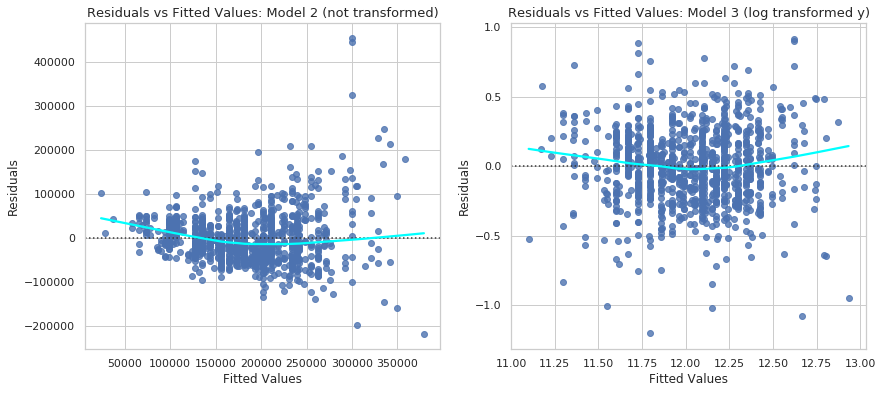

In [67]:
# Read in correct (log transformed) predictions
MODEL_PATH='../resource/asnlib/publicdata/model_3_preds.csv'
m3_y_hat = pd.read_csv(MODEL_PATH, index_col=0, header=None).squeeze()

# Create model 2 predictions
y_hat_train = model_2.predict(feats_train)

# Grab training labels
price_train = house_train['SalePrice'].values

# Make a figure with 2 subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.set(style="whitegrid")

# Plot residuals vs fitted for model 2 (not transformed 'SalePrice')
sns.residplot(
    y_hat_train,
    price_train,
    lowess=True,
    color='b',
    ax=ax[0],
    line_kws={'color':'cyan'}
)
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel("Residuals")
ax[0].set_title('Residuals vs Fitted Values: Model 2 (not transformed)', fontsize=13);

# Plot residuals vs fitted for model 3 (log transformed)
sns.residplot(
    m3_y_hat,
    np.log(price_train),
    lowess=True,
    color='b',
    ax=ax[1],
    line_kws={'color':'cyan'}
)
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel("Residuals")
ax[1].set_title('Residuals vs Fitted Values: Model 3 (log transformed y)', fontsize=13);

Although not perfect, using the logarithm-transformed `SalePrice` yields an improvement in the resulting model. Specifically, the assumption of constant variance appears to be more reasonable with this transformed model.

The world is complex, messy, and non-linear. It's extremely unlikely that the assumptions of linear regression will be absolutely true in any practical scenario.

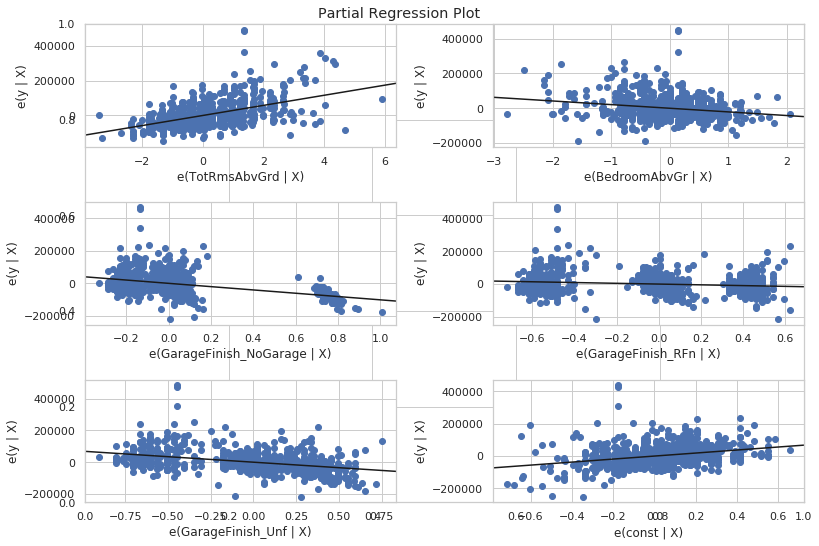

In [68]:
from statsmodels.graphics.regressionplots import plot_partregress_grid
fig, ax = plt.subplots(figsize=(12,8))
plot_partregress_grid(model_2, fig=fig)
plt.show()

[Back to top](#top)
<a id = "scikit-learn"></a>

### The `scikit-learn` Implementation

So far, you've only used the `statsmodels` package to build regression models. Another popular machine learning Python library is `scikit-learn` (also referred to as `sklearn`). Here you will build the _same_  linear regression model using `scikit-learn`.

One nice feature of `scikit-learn` is its consistent interface. Regardless of the machine learning technique applied, the same 4-step modeling pattern is applied:

1. Import the model's class
2. Instantiate the model
3. Fit the model
4. Make predictions

One thing to watch for is that the `scikit-learn` library routines can be particular about the data ingested (notably in its shape and numeric type).

Requirements:
1. The target variable and features must be separate objects.
2. All data must be numeric (categorical variables must be replaced with dummy variables).

Here's an example:

#### Step 0: Prepare data for `sklearn`
Separate target from features and create dummies

In [72]:
# target - training & testing
y_train = house_train['SalePrice']
y_test = house_test['SalePrice']

# features - training & testing
X_train = pd.get_dummies(house_train[MODEL_2_COLS], drop_first=True)
X_test = pd.get_dummies(house_test[MODEL_2_COLS], drop_first=True)

#### 1. Import required classes/functions for modelling

In [73]:
from sklearn.linear_model import LinearRegression

#### 2. Instantiate an object of the appropriate model class

In [74]:
lin_reg = LinearRegression()

#### 3. Apply the object `fit` method to data

In [75]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 4. Predict using the model object (after fitting) on new data

You can make predictions for your testing data and review the R-squared score.

In [76]:
y_test_hat = pd.Series(lin_reg.predict(X_test), index=y_test.index)
print('Actual prices for first 5 test observations')
display(y_test[:5])

print('Predicted prices for first 5 test observations')
display(pd.Series(y_test_hat, index=y_test.index)[:5])

Actual prices for first 5 test observations


1     181500
2     223500
4     250000
12    144000
13    279500
Name: SalePrice, dtype: int64

Predicted prices for first 5 test observations


1     181620.006460
2     181620.006460
4     247852.704223
12     98357.950331
13    210659.178250
dtype: float64

Print the R-squared score on testing set using the model object's `score` method.

In [77]:
print('r-squared score: {}'.format(lin_reg.score(X_test, y_test)))

r-squared score: 0.5097068191440465


<a id = "scikit-learn-practice"></a>
### Practice with `scikit-learn`

Next, you'll practice building models with `scikit-learn`. For the next question, you will use all of the features. The next cell will prepare the dataset for you to ensure reproducibility. It's not required to know all of the code in the next cell, as it uses some more advanced features of the `scikit-learn` library; you are encouraged to consult the `scikit-learn` documentation to do your own research.

In [78]:
from sklearn.preprocessing import OneHotEncoder

# function to add column names to dummy variables
def dummy_col_adder(array, ohe_obj, cat_cols, index):
    dummy_cols = []
    for col, cat_set in zip(cat_cols, ohe_obj.categories_):
        for cat in cat_set:
            dummy_cols.append(col+'_'+cat)
    return pd.DataFrame(array, index=index, columns=dummy_cols)


### Preprocess TRAINING

# separate features and target variables
X_train = house_train.drop('SalePrice', axis=1)
X_test = house_test.drop('SalePrice', axis=1)

y_train = house_train['SalePrice']
y_test = house_test['SalePrice']

# separate numeric and categorical variables
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(exclude=['object'])

# create dummy variables for categorical data
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
cat_cols = X_train_cat.columns
row_index_tr = X_train_cat.index
X_train_dummies = dummy_col_adder(ohe.fit_transform(X_train_cat), ohe, cat_cols, row_index_tr)

# concatenate numeric and dummy training variables
X_train_prepared = pd.concat([X_train_num, X_train_dummies], axis=1)


### Preprocess TESTING

# separate numeric and categorical variables
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(exclude=['object'])

# create dummy variables for categorical data
row_index_test = X_test_cat.index
X_test_dummies = dummy_col_adder(ohe.transform(X_test_cat), ohe, cat_cols, row_index_test)

# concatenate numeric and dummy testing variables 
X_test_prepared = pd.concat([X_test_num, X_test_dummies], axis=1)


### Show prepared datasets
print('First 5 rows of prepared TRAINING:\n')
display(X_train_prepared.head())
print('First 5 rows of prepared TESTING:\n')
display(X_test_prepared.head())

First 5 rows of prepared TRAINING:



,LotArea,YearBuilt,TotRmsAbvGrd,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,1stFlrSF,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
1000,10206,1952,4,1,0,2,1,528,944,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
314,9600,1925,6,1,1,3,1,546,832,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
518,9531,1998,7,2,1,3,1,546,882,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1363,8499,2006,6,2,1,3,1,432,616,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
537,12735,1972,5,1,0,3,1,576,864,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


First 5 rows of prepared TESTING:



,LotArea,YearBuilt,TotRmsAbvGrd,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,1stFlrSF,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf
1,9600,1976,6,2,0,3,1,460,1262,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,11250,2001,6,2,1,3,1,608,920,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,14260,2000,9,2,1,4,1,836,1145,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12,12968,1962,4,1,0,2,1,352,912,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13,10652,2006,7,2,0,3,1,840,1494,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


[Back to top](#top)
<a id = "q13"></a>

#### Question 13

Your task is to use `scikit-learn` to create a linear regression model using all of the features in the training set `X_train_prepared` & the corresponding target vector `y_train`.

+ Do not transform the `SalePrice` column for this example.
+ Use the `LinearRegression` class from the [`sklearn.linear_model`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.
+ After fitting your model, use the `score` method to calculate the R-squared scores for *both* the training dataset `(X_train_prepared, y_train)` and the testing dataset `(X_test_prepared, y_test)`.
  + Assign the training R-squared value to the variable `ans13_train`.
  + Assign the testing R-squared value to the variable `ans13_test`.
+ Round numerical results to 4 decimal places.

In [85]:
### GRADED
### 
### Construct & fit a scikit-learn linear regression model using
### *all* columns from the training data (X_train_prepared, y_train).
###   Computer the R-squared on the training set & assign to `ans13_train`.
###   Computer the R-squared on the testing set & assign to `ans13_test`.
###
### Round results to 4 decimal places.
### 
### Your solution here:
model_4 = LinearRegression()

# target - training & testing
#y_train = X_train_prepared['SalePrice']
#y_test = X_test_prepared['SalePrice']

# features - training & testing
X_train = X_train_prepared #pd.get_dummies(house_train[MODEL_2_COLS], drop_first=True)
X_test = X_test_prepared #pd.get_dummies(house_test[MODEL_2_COLS], drop_first=True)

model_4.fit(X_train, y_train)

y_test_hat = pd.Series(model_4.predict(X_test), index=y_test.index)
#print('Actual prices for first 5 test observations')
#display(y_test[:5])

#print('Predicted prices for first 5 test observations')
#display(pd.Series(y_test_hat, index=y_test.index)[:5])

#print('r-squared score: {}'.format(model_4.score(X_test, y_test)))


ans13_train = model_4.score(X_train, y_train)
ans13_test = model_4.score(X_test, y_test)


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


[Back to top](#top)
<a id = "communicate"></a>

## Communicate Results

This step, while important for sharing results with key stakeholders, is out-of-scope for this assignment. Depending on the precise requirements laid out in Step 1 (Define the Problem), you would possibly be able to validate or invalidate some hypothesis. Sometimes, results can be inconclusive. It's important to keep the use case and audience in mind when communicating the value of the model attained.

[Back to top](#top)
<a id = "deploy"></a>

## Deploy

Finally, to deploy the model in production requires preserving the model object (from either `statsmodels` or `scikit-learn`) for future use. For information on model persistence, check out the [documentation for the Python `pickle` module](https://docs.python.org/3/library/pickle.html) and the [`scikit-learn` documentation on model persistence](https://scikit-learn.org/stable/modules/model_persistence.html).